In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.image as mpimg
import sys
import numpy as np

you have a big data and wanna understand the main direction of components inside the data

In [2]:
def compress(image_src):
    # Load an image
    img = mpimg.imread(image_src)  # Replace with your image path
    img_shape = img.shape

    # Check the number of channels in the image
    if len(img_shape) == 2:  # Grayscale image
        X = img.reshape(-1, 1)
    elif img_shape[2] == 4:  # RGBA image
        X = img.reshape(-1, 4)
    else:  # Standard RGB image
        X = img.reshape(-1, 3)

    original_data_size = img.nbytes
    print(f"Original Data Size: {original_data_size/1024} KB")

    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Calculate a suitable number of components
    n_components = min(50, min(X_scaled.shape))
    # n_components = 90

    # Apply PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    # Inverse transform to reconstruct the image
    X_reconstructed = scaler.inverse_transform(pca.inverse_transform(X_pca))

    # Reshape data back to its original shape
    if len(img_shape) == 2:  # Grayscale image
        img_reconstructed = X_reconstructed.reshape(img_shape[0], img_shape[1])
    else:  # RGB or RGBA image
        img_reconstructed = X_reconstructed.reshape(img_shape)

    # Clip the reconstructed image values to ensure they fall within the valid range
    img_reconstructed = np.clip(img_reconstructed, 0, 1) if img_reconstructed.dtype == np.float32 else np.clip(img_reconstructed, 0, 255).astype(int)

    # Calculate and print the sizes of the original and compressed data
    # original_data_size = X.nbytes
    compressed_data_size = X_pca.nbytes
    print(f"Compressed Data Size: {compressed_data_size/1024} KB")


    # Display the original and compressed images
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(img, cmap='gray' if len(img_shape) == 2 else None)
    ax[0].set_title('Original Image')
    ax[1].imshow(img_reconstructed, cmap='gray' if len(img_shape) == 2 else None)
    ax[1].set_title('Compressed Image with PCA')
    plt.show()


Original Data Size: 31242.1875 KB
Compressed Data Size: 249937.5 KB


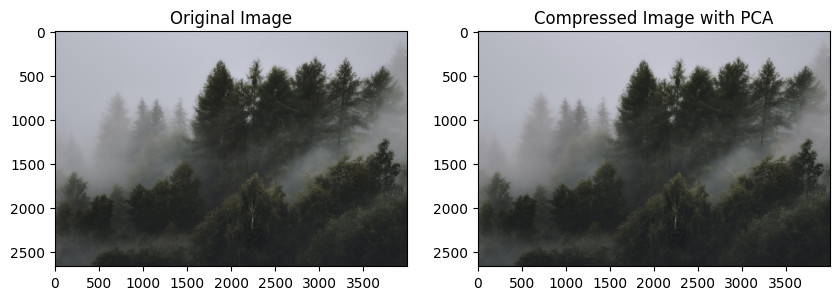

In [3]:
compress("pexels-eberhard-grossgasteiger-1367192.jpg")

Original Data Size: 3164.0625 KB
Compressed Data Size: 3164.0625 KB


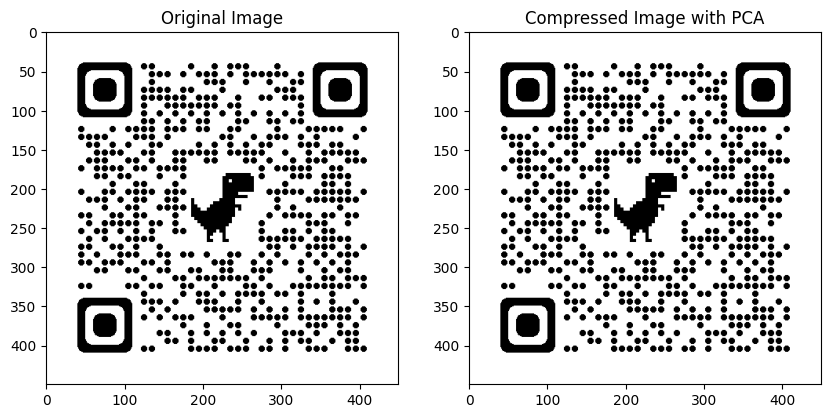

In [4]:
compress("qrcode_httpd.apache.org.png")

Original Data Size: 62370.673828125 KB
Compressed Data Size: 498965.390625 KB


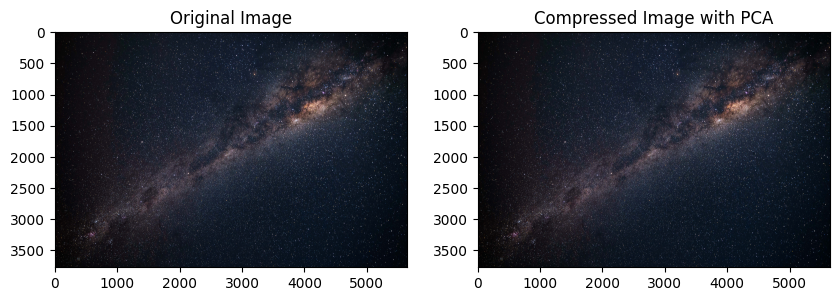

In [5]:
compress("pexels-philippe-donn-1169754.jpg")